import numpy as np
import opencv2 as cv

In [1]:
import numpy as np
import cv2 
import  matplotlib.pyplot as plt
from time import sleep
%matplotlib inline

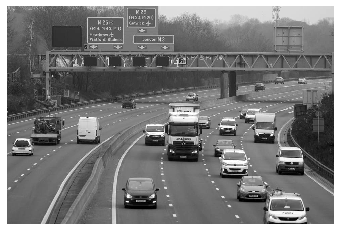

In [48]:
'''
cv2.IMREAD_UNCHANGED  or -1
cv2.IMREAD_GRAYSCALE  or 0
cv2.IMREAD_COLOR  or 1


#Displays image inside a window
cv2.imshow('the title you wnat',img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

'''


img = cv2.imread('highway1.jpg', -1) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.imshow(gray,cmap="gray")
plt.show()


[[161 137 179 ... 212 212 212]
 [138 115 182 ... 212 212 212]
 [125 119 176 ... 212 212 212]
 ...
 [ 91  91  91 ...  99  99  99]
 [ 91  91  91 ... 100 100  99]
 [ 91  91  91 ... 100 100 100]]


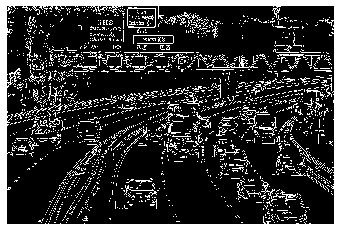

In [54]:
print(gray)
edges=cv2.Canny(gray,50,100)
plt.axis("off")
plt.imshow(edges,cmap="gray")
plt.show()


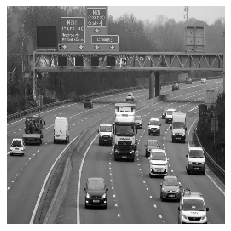

In [62]:
img = cv2.imread('highway1.jpg', 0) 

img=cv2.resize(img,(256,256))
plt.axis("off")
plt.imshow(img,cmap="gray")
plt.show()


#gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)




In [63]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

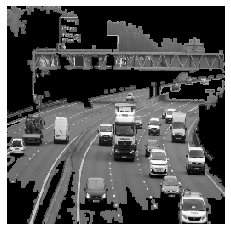

In [64]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(segmented,cmap="gray")
plt.show()


In [2]:
def plt_image(img):
    plt.axis("off")
    plt.imshow(img,cmap="gray")
    plt.show()


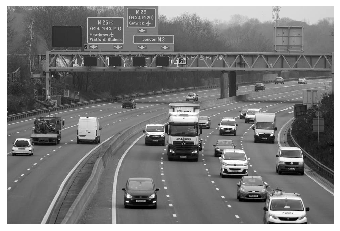

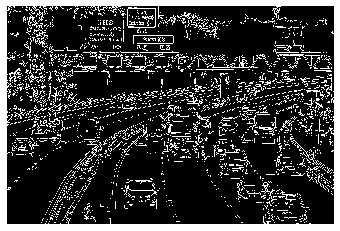

In [94]:
img=cv2.imread("highway1.jpg",0)
plt_image(img)
frame=img

# Parameters
blur = 21
canny_low = 15
canny_high = 150
min_area = 0.0005
max_area = 0.95
dilate_iter = 10
erode_iter = 10
mask_color = (0.0,0.0,0.0)

image_gray=frame


edges = cv2.Canny(image_gray, canny_low, canny_high)
plt_image(edges)


In [96]:
edges = cv2.Canny(image_gray, canny_low, canny_high)


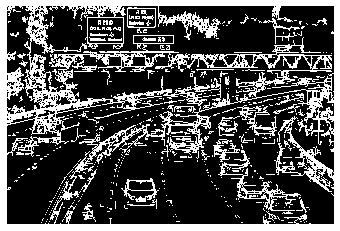

In [97]:
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

plt_image(edges)


In [100]:
# get the contours and their areas
contour_info = [(c, cv2.contourArea(c),) for c in cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0]]


In [101]:
        # Get the area of the image as a comparison
image_area = frame.shape[0] * frame.shape[1]  

# calculate max and min areas in terms of pixels
max_area = max_area * image_area
min_area = min_area * image_area

In [102]:
mask = np.zeros(edges.shape, dtype = np.uint8)


In [110]:
        # Go through and find relevant contours and apply to mask
for contour in contour_info:
    if contour[1] > min_area and contour[1] < max_area:
        mask = cv2.fillConvexPoly(mask, contour[0], (255,))

IndentationError: expected an indented block (3592984722.py, line 4)

<b>Video processing</b>


In [12]:
video = cv2.VideoCapture('media/videos.carsvid.wmv')
kernel=None
backgroundObject = cv2.createBackgroundSubtractorMOG2(detectShadows = True)

while True:
    ret,frame=video.read()
    if not ret:
        break

    cv2.imshow('Original Frame, Extracted Foreground and Detected Cars', cv2.resize(frame, None, fx=0.5, fy=0.5))
    k = cv2.waitKey(30) &  0xff
    if k == 27:
        break
   
cv2.destroyAllWindows()


(python3:4407): GStreamer-CRITICAL **: 13:55:08.938: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (713) open OpenCV | GStreamer warning: Error opening bin: no element "media"
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (480) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0] global ../modules/videoio/src/cap.cpp (116) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.2.0) ../modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): media/videos.carsvid.wmv in function 'icvExtractPattern'




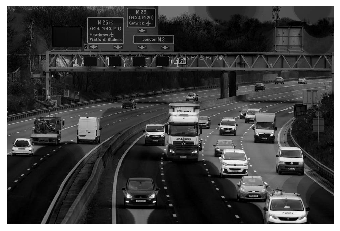

In [8]:
def subtract_background(image, radius=50, light_bg=False):
        from skimage.morphology import white_tophat, black_tophat, disk
        str_el = disk(radius) #you can also use 'ball' here to get a slightly smoother result at the cost of increased computing time
        if light_bg:
            return  black_tophat(image, str_el)
        else:
            return white_tophat(image, str_el)

img=cv2.imread("highway1.jpg",0)
img=subtract_background(img)
plt_image(img)


In [6]:
# load a video
video = cv2.VideoCapture('highwayvid.mp4')

# You can set custom kernel size if you want.
kernel = None

# Initialize the background object.
backgroundObject = cv2.createBackgroundSubtractorMOG2(history=64,detectShadows = True)

while True:
    
    # Read a new frame.
    ret, frame = video.read()

    # Check if frame is not read correctly.
    if not ret:
        break

    # Apply the background object on the frame to get the segmented mask. 
    fgmask = backgroundObject.apply(frame)
    #initialMask = fgmask.copy()
    
    # Perform thresholding to get rid of the shadows.
    _, fgmask = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    #noisymask = fgmask.copy()
    
    # Apply some morphological operations to make sure you have a good mask
    fgmask = cv2.erode(fgmask, kernel, iterations = 1)
    fgmask = cv2.dilate(fgmask, kernel, iterations = 4)
    
    # Detect contours in the frame.
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the frame to draw bounding boxes around the detected cars.
    frameCopy = frame.copy()
    
    # loop over each contour found in the frame.
    for cnt in contours:
        
        # Make sure the contour area is somewhat higher than some threshold to make sure its a car and not some noise.
        if cv2.contourArea(cnt) >0:
            
            # Retrieve the bounding box coordinates from the contour.
            x, y, width, height = cv2.boundingRect(cnt)
            
            # Draw a bounding box around the car.
            cv2.rectangle(frameCopy, (x , y), (x + width, y + height),(0, 0, 255), 2)
            
            # Write Car Detected near the bounding box drawn.
            #cv2.putText(frameCopy, 'Car Detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1, cv2.LINE_AA)
    
    # Extract the foreground from the frame using the segmented mask.
    foregroundPart = cv2.bitwise_and(frame, frame, mask=fgmask)
        
    # Stack the original frame, extracted foreground, and annotated frame. 
    stacked = np.hstack((frame, foregroundPart, frameCopy))

    # Display the stacked image with an appropriate title.
    cv2.imshow('Original Frame, Extracted Foreground and Detected Cars', cv2.resize(stacked, None, fx=0.5, fy=0.5))
    #cv2.imshow('initial Mask', initialMask)
    #cv2.imshow('Noisy Mask', noisymask)
    #cv2.imshow('Clean Mask', fgmask)

    sleep(0.1)
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xff
    
    # Check if 'q' key is pressed.
    if k == ord('q'):
        
        # Break the loop.
        break

# Release the VideoCapture Object.
video.release()

# Close the windows.q
cv2.destroyAllWindows()